+ Data preprocessing

불필요 칼럼제거, 장소명 결측치 제거, 컬럼 정리, 년월 분리

|**변수명**|**값 설명**|
|:-----|:-----|
|**위치좌표 X축값**|위도값|
|**위치좌표 Y축값**|경도값|
|**구분**| 시설의 용도를 구분하여 설명함.|
|**장소명**|새섬, 문섬, 범섬, 섶섬 등등|
|**소재지**|세부 주소|
|**year**|데이터 업데이트 날짜|
|**month**|데이터 업데이트 날짜 중 월을 분류|
|**day**|데이터 업데이트 날짜 중 일을 분류|
|**dayofweek**|데이터 업데이트 날짜 중 일을 숫자로 분류 ex) 0은 월요일|

   ## 분석방향

- 장소명, X축,Y축은 folium 팝업 등으로 활용생각.
- 구분은 시설을 구분하여 어떤 시설이 많고, 시설 종류에 따라 주변 유동인구가 어떤 상관관계가 있는지 추측.
- 데이터기준일자는 시계열에 활용되거나 기간별로 방문인구 분석에 쓰일 것이라 생각듬.

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
%matplotlib inline

## 데이터 불러오기

In [4]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: DCC6-5FA5

 C:\Users\user\Desktop\datascience\multicampus_4 디렉터리

2021-07-15  오전 12:05    <DIR>          .
2021-07-15  오전 12:05    <DIR>          ..
2021-07-14  오후 11:44    <DIR>          .ipynb_checkpoints
2021-07-14  오후 04:02         9,314,360 3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용.csv
2021-07-14  오전 11:45            32,690 9_제주_관광을_위한_날짜별_ 지역_추천_ 데이터_동준 .ipynb
2021-07-14  오전 11:45            94,331 BC카드 데이터 전처리_조아진.ipynb
2021-07-12  오후 11:02           343,531 Jeju_for_new_ceo(장은준).ipynb
2021-07-14  오후 04:43         1,665,260 Jeju_POI.ipynb
2021-07-15  오전 12:05           428,242 Untitled.ipynb
2021-07-14  오후 11:44                72 Untitled1.ipynb
2021-07-14  오후 11:52           149,399 논문.PNG
2021-07-14  오전 11:45           843,127 상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용.ipynb
2021-07-14  오후 05:40           101,558 유동인구 분석 ing.ipynb
2021-07-14  오후 10:19            27,895 유동인구 분석.ipynb
2021-07-14  오후 02:20         7,133,059 제주_POI.csv
2021-07-14  오전 11:45   

In [5]:
df=pd.read_csv("제주특별자치도_제주도장소(POI)데이터_20151231.csv",encoding='cp949',low_memory=False)

In [6]:
df.head()

,장소 POI에 대한 ID 구분 번호 체계,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,데이터기준일자
0,3,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015-12-31
1,4,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015-12-31
2,5,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015-12-31
3,6,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015-12-31
4,7,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015-12-31


In [7]:
df.shape

(74439, 7)

## 필요없는 칼럼 삭제

In [8]:
df_2 = df.drop(['장소 POI에 대한 ID 구분 번호 체계 '], axis=1)

In [9]:
df_2.head()

,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,데이터기준일자
0,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015-12-31
1,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015-12-31
2,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015-12-31
3,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015-12-31
4,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015-12-31


## 결측치 제거

In [10]:
place_list=df_2['장소명'].unique().tolist()
# place_list

In [11]:
len(df['장소명'].unique().tolist())

65772

In [12]:
df_2=df_2[~df_2['장소명'].isin(['1', '2', '3','4','5','6','7','8','9'])]
df_2

,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,데이터기준일자
0,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015-12-31
1,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015-12-31
2,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015-12-31
3,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015-12-31
4,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015-12-31
...,...,...,...,...,...,...
74434,126.542149,33.492701,교육기관,제주CMS에듀케이션,제주특별자치도 제주시 아라이동 3012-7,2015-12-31
74435,126.507533,33.248077,자동차관련,이마트서귀포점전기자동차충전기,제주특별자치도 서귀포시 법환동 841-2,2015-12-31
74436,126.520938,33.517848,자동차관련,이마트제주점전기자동차충전기,제주특별자치도 제주시 삼도이동 1264,2015-12-31
74437,126.282677,33.288644,쇼핑/편의,제주영어마을지에스25,제주특별자치도 서귀포시 대정읍 구억리 산 11,2015-12-31


In [13]:
real_list=[]

for i in range(1,1001):
    if str(i) in place_list:
        real_list.append(str(i))

print(real_list)
        

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']


In [14]:
df_2=df_2[~df_2['장소명'].isin(['10', '11', '12', '13', '14', '15', '16', '17', '18'])]

In [15]:
df_2=df_2[~df_2['장소명'].isin(['-'])]

In [16]:
df_2=df_2[~df_2['장소명'].isin(['N6',
 'N4',
 'N5',
 'N7',
 'S4',
 'S3',
 'S5',
 'N2',
 'N3',
 'N8',
 'N1',
 'S9',
 'S1',
 'S2',
 'S6',
 'S7',
 'S8',
 'E9',
 'N9',
 'E4',
 'E3',
 'E1',
 'E2',
 'E5',
 'E6',
 'E8',
 'E7'])]

In [17]:
# df_2['장소명'].unique().tolist()

In [18]:
pd.set_option('display.max_rows',300)

# df_2.sample(300)

## 결측치 결과 확인

In [19]:
df_2.isnull().sum()

위치좌표 X축값     0
위치좌표 Y축값     0
구분           0
장소명          0
소재지          0
데이터기준일자      0
dtype: int64

## 날짜 년월 분리

In [20]:
df_2['데이터기준일자']

0        2015-12-31
1        2015-12-31
2        2015-12-31
3        2015-12-31
4        2015-12-31
            ...    
74434    2015-12-31
74435    2015-12-31
74436    2015-12-31
74437    2015-12-31
74438    2015-12-31
Name: 데이터기준일자, Length: 73760, dtype: object

In [21]:
import pandas as pd
df_2['데이터기준일자'] = pd.to_datetime(df_2['데이터기준일자'], errors='coerce')

In [22]:
df_2['year'] = df_2['데이터기준일자'].dt.year #연도
df_2['month'] = df_2['데이터기준일자'].dt.month #월
df_2['day'] = df_2['데이터기준일자'].dt.day #일
df_2['dayofweek'] = df_2['데이터기준일자'].dt.dayofweek #요일 (월 = 0)

In [23]:
df_2

,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,데이터기준일자,year,month,day,dayofweek
0,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015-12-31,2015,12,31,3
1,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015-12-31,2015,12,31,3
2,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015-12-31,2015,12,31,3
3,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015-12-31,2015,12,31,3
4,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015-12-31,2015,12,31,3
...,...,...,...,...,...,...,...,...,...,...
74434,126.542149,33.492701,교육기관,제주CMS에듀케이션,제주특별자치도 제주시 아라이동 3012-7,2015-12-31,2015,12,31,3
74435,126.507533,33.248077,자동차관련,이마트서귀포점전기자동차충전기,제주특별자치도 서귀포시 법환동 841-2,2015-12-31,2015,12,31,3
74436,126.520938,33.517848,자동차관련,이마트제주점전기자동차충전기,제주특별자치도 제주시 삼도이동 1264,2015-12-31,2015,12,31,3
74437,126.282677,33.288644,쇼핑/편의,제주영어마을지에스25,제주특별자치도 서귀포시 대정읍 구억리 산 11,2015-12-31,2015,12,31,3


In [24]:
df_2 = df_2.drop(['데이터기준일자'], axis=1)

In [25]:
df_2.to_csv('제주_POI.csv', encoding='cp949', index=False)

In [26]:
df_2.head(10)

,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,year,month,day,dayofweek
0,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015,12,31,3
1,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015,12,31,3
2,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015,12,31,3
3,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015,12,31,3
4,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015,12,31,3
5,126.222533,33.241524,공공기관,일과2리어촌계,제주특별자치도 서귀포시 대정읍 일과리 1419-3,2015,12,31,3
6,126.270455,33.170157,지명관련,가파도,제주특별자치도 서귀포시 대정읍 가파리 288,2015,12,31,3
7,126.268257,33.117671,지명관련,마라도,제주특별자치도 서귀포시 대정읍 가파리 617,2015,12,31,3
8,126.270300,33.425837,교육기관,수원초등학교,제주특별자치도 제주시 한림읍 대림리 1591,2015,12,31,3
9,126.312871,33.420172,교육기관,어도초등학교,제주특별자치도 제주시 애월읍 봉성리 3276,2015,12,31,3


## 변수 분석

In [27]:
df_2gubun=df_2['구분'].sort_values().value_counts()
df_2gubun

쇼핑/편의         11606
음식점           10451
주택관련           7666
교통시설           6171
도로시설           6035
지명관련           5370
관광/숙박          4622
기업             4542
자동차관련          3487
교육기관           2815
의료/복지          2245
공공기관           2068
금융기관           1651
레져/스포츠         1551
문화/종교/예술       1468
농공시설           1374
치안기관            279
공원/산/동.식물원      268
언론기관             53
공사중명칭            38
Name: 구분, dtype: int64

<AxesSubplot:>

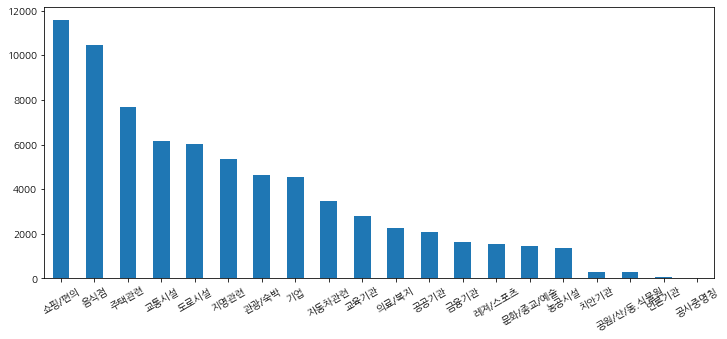

In [28]:
plt.figure(figsize=(12,5))
df_2gubun.plot.bar(rot=30)

In [29]:
df_place = df_2['장소명'].sort_values().value_counts()
df_place

노상주차장           431
무료주차장           335
공영주차장            77
공중화장실            76
SK주유소            71
               ... 
광영교               1
제주승마공원입구          1
C&P프린트샵           1
연동공간에버빌주차장입구      1
신영빌딩주차장입구         1
Name: 장소명, Length: 65727, dtype: int64

In [30]:
df_place_head=df_place.head(10)
df_place_head

노상주차장      431
무료주차장      335
공영주차장       77
공중화장실       76
SK주유소       71
GS주유소       55
개방화장실       53
주차장         43
새마을금고       34
SOiL주유소     34
Name: 장소명, dtype: int64

<AxesSubplot:>

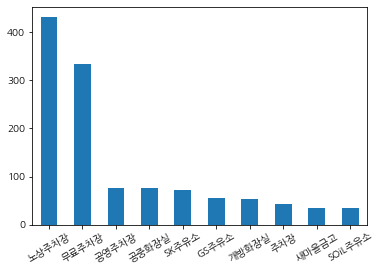

In [31]:
df_place_head.plot.bar(rot=30)

<AxesSubplot:ylabel='장소명'>

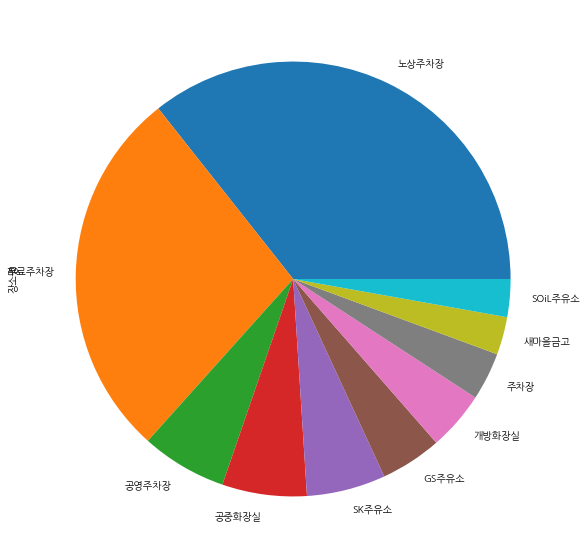

In [32]:
plt.figure(figsize=(10,10))
df_place_head.plot.pie()

In [33]:
df_2['소재지']

0           제주특별자치도 서귀포시 서귀동 758-2
1           제주특별자치도 서귀포시 서귀동 산 3-3
2             제주특별자치도 서귀포시 보목동 산 1
3             제주특별자치도 서귀포시 서귀동 산 4
4             제주특별자치도 서귀포시 법환동 산 2
                   ...            
74434      제주특별자치도 제주시 아라이동 3012-7
74435       제주특별자치도 서귀포시 법환동 841-2
74436       제주특별자치도 제주시 삼도이동 1264 
74437    제주특별자치도 서귀포시 대정읍 구억리 산 11
74438      제주특별자치도 제주시 아라이동 1622-8
Name: 소재지, Length: 73760, dtype: object

In [34]:
df_2_sample=df_2.sample(500)
df_2_sample

,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,year,month,day,dayofweek
4043,126.309308,33.449060,지명관련,머물동,제주특별자치도 제주시 애월읍 곽지리 1694-2,2015,12,31,3
7087,126.519626,33.500125,금융기관,늘푸른신용협동조합(본점),제주특별자치도 제주시 삼도일동 534-10,2015,12,31,3
31100,126.562541,33.240146,음식점,부두수산,제주특별자치도 서귀포시 서귀동 669-7,2015,12,31,3
11711,126.459769,33.479459,자동차관련,발리렌트카,제주특별자치도 제주시 도평동 13-1,2015,12,31,3
53912,126.518088,33.518064,음식점,삼호정,제주특별자치도 제주시 삼도이동 1207-3,2015,12,31,3
...,...,...,...,...,...,...,...,...,...
47442,126.512108,33.250794,음식점,안성식당,제주특별자치도 서귀포시 서호동 1477-5,2015,12,31,3
48264,126.574427,33.252111,기업,태양토건,제주특별자치도 서귀포시 동홍동 141-4,2015,12,31,3
26939,126.495206,33.387220,레져/스포츠,대피소,제주특별자치도 제주시 애월읍 광령리 산 183-6,2015,12,31,3
41116,126.486842,33.485276,주택관련,대지주택,제주특별자치도 제주시 연동 253-11,2015,12,31,3


<AxesSubplot:xlabel='위치좌표 X축값 ', ylabel='위치좌표 Y축값 '>

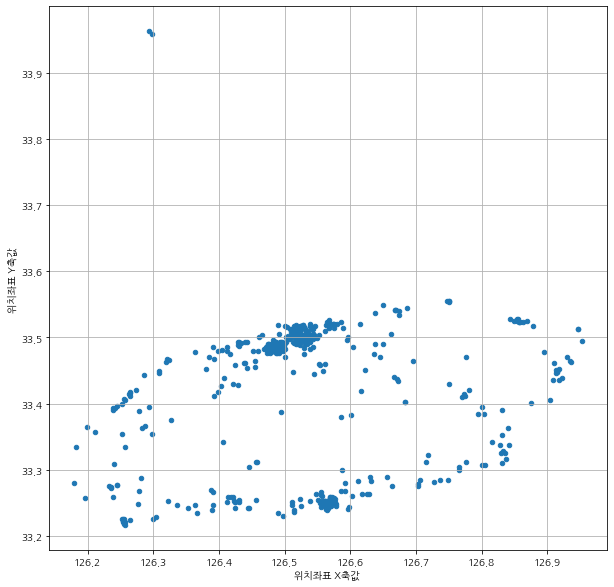

In [35]:
df_2_sample[['위치좌표 X축값 ','위치좌표 Y축값 ']].plot.scatter(x='위치좌표 X축값 ',y='위치좌표 Y축값 ',figsize=(10,10),grid=True)

In [36]:
import folium

df_2_sample['위치좌표 X축값 '].mean()
df_2_sample['위치좌표 Y축값 '].mean()

33.41749839799998

In [37]:
map=folium.Map(location=[df_2_sample['위치좌표 Y축값 '].mean(),df_2_sample['위치좌표 X축값 '].mean()],zoom_start=10)


for n in df_2_sample.index:
    name=df_2_sample.loc[n,'구분']
    
    location=[df_2_sample.loc[n,'위치좌표 Y축값 '], df_2_sample.loc[n,'위치좌표 X축값 ']]
    adress=df_2_sample.loc[n,'소재지']
    popup=f'{name}-{adress}'

    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map

<AxesSubplot:>

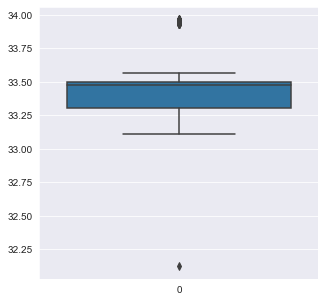

In [38]:
plt.figure(figsize=(5,5))

sns.set_style('darkgrid')
sns.boxplot(data=df_2['위치좌표 Y축값 '])

<AxesSubplot:>

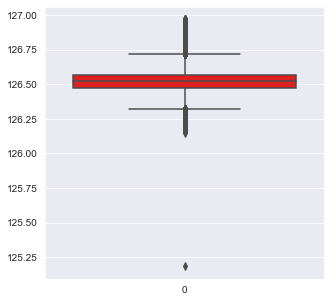

In [39]:
plt.figure(figsize=(5,5))

sns.set_style('darkgrid')
sns.boxplot(data=df_2['위치좌표 X축값 '],color='red')

{'whiskers': [<matplotlib.lines.Line2D at 0x27116728640>,
 'caps': [<matplotlib.lines.Line2D at 0x27116728d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x271167282b0>],
 'medians': [<matplotlib.lines.Line2D at 0x27116737400>],
 'fliers': [<matplotlib.lines.Line2D at 0x2711671fa00>],
 'means': []}

<Figure size 1080x576 with 0 Axes>

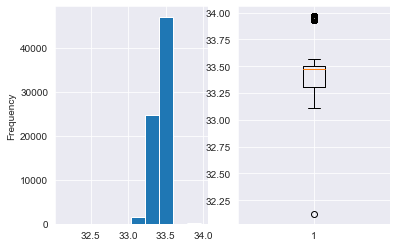

In [40]:
plt.figure(figsize = (15,8))
fig, ax = plt.subplots(1,2)

df_2['위치좌표 Y축값 '].plot(kind = 'hist', ax = ax[0])
plt.boxplot(df['위치좌표 Y축값 '])

In [41]:
first_quantile = df_2['위치좌표 Y축값 '].quantile(0.25)
third_quantile = df_2['위치좌표 Y축값 '].quantile(0.75)
print('1분위수 : ', first_quantile)
print('3분위수 : ', third_quantile)

df_quantile = df_2[(df_2['위치좌표 Y축값 '] >= first_quantile) & (df_2['위치좌표 Y축값 '] <= third_quantile)]
df_quantile.head()

1분위수 :  33.30338675
3분위수 :  33.500108


,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,year,month,day,dayofweek
8,126.270300,33.425837,교육기관,수원초등학교,제주특별자치도 제주시 한림읍 대림리 1591,2015,12,31,3
9,126.312871,33.420172,교육기관,어도초등학교,제주특별자치도 제주시 애월읍 봉성리 3276,2015,12,31,3
10,126.293435,33.442419,교육기관,귀덕초등학교,제주특별자치도 제주시 한림읍 귀덕리 1118,2015,12,31,3
11,126.330457,33.435404,교육기관,납읍초등학교,제주특별자치도 제주시 애월읍 납읍리 1504-2,2015,12,31,3
12,126.437909,33.476643,지명관련,참오랭이,제주특별자치도 제주시 외도일동 21,2015,12,31,3


In [42]:
df_2.shape

(73760, 9)

In [43]:
df_quantile.shape

(36887, 9)

### 데이터수가 많이 줄어드는 걸 보니 위도,경도에서 이상치 제거는 맞지 않는듯하다.

In [44]:
df_sample3=df_quantile.sample(500)

In [45]:
map=folium.Map(location=[df_sample3['위치좌표 Y축값 '].mean(),df_sample3['위치좌표 X축값 '].mean()],zoom_start=10)


for n in df_sample3.index:
    name=df_sample3.loc[n,'구분']
    
    location=[df_sample3.loc[n,'위치좌표 Y축값 '], df_sample3.loc[n,'위치좌표 X축값 ']]
    adress=df_sample3.loc[n,'소재지']
    popup=f'{name}-{adress}'

    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map

In [46]:
df_2[df_2['소재지'].str.contains('추자면')].shape

(290, 9)

In [47]:
df_2[df_2['소재지'].str.contains('추자면')].head(15)

,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,year,month,day,dayofweek
13152,126.329370,33.944656,쇼핑/편의,추자도수협간이위판장,제주특별자치도 제주시 추자면 신양리 434-17,2015,12,31,3
13153,126.329008,33.944772,교통시설,신양항여객선대합실,제주특별자치도 제주시 추자면 신양리 434-1,2015,12,31,3
13154,126.328720,33.944831,교통시설,무료주차장,제주특별자치도 제주시 추자면 신양리 434-4,2015,12,31,3
13191,126.328008,33.945280,기업,한일해운,제주특별자치도 제주시 추자면 신양리 434-9,2015,12,31,3
13192,126.327908,33.945630,교통시설,신양1리,제주특별자치도 제주시 추자면 신양리 434-7,2015,12,31,3
13193,126.328495,33.945639,공공기관,신양1리경로당,제주특별자치도 제주시 추자면 신양리 392-1,2015,12,31,3
13194,126.329108,33.945664,관광/숙박,사계절민박,제주특별자치도 제주시 추자면 신양리 422-4,2015,12,31,3
13195,126.328883,33.945772,쇼핑/편의,부두식품,제주특별자치도 제주시 추자면 신양리 423-1,2015,12,31,3
13196,126.329233,33.946255,공공기관,하추자보건진료소,제주특별자치도 제주시 추자면 신양리 413-3,2015,12,31,3
13197,126.330320,33.945697,관광/숙박,하추자민박,제주특별자치도 제주시 추자면 신양리 207,2015,12,31,3


In [48]:
df_2[df_2['소재지'].str.contains('제주시')].value_counts().sum()

49546

In [49]:
df_2.shape

(73760, 9)

In [50]:
b=df_2[df_2['소재지'].str.contains('서귀포시')].value_counts().sum()
b

24214

In [51]:
a=df_2[df_2['소재지'].str.contains('제주시|서귀포시')].value_counts().sum()
a

73760

In [52]:
df_3= pd.DataFrame({'제주시':[a-b],
                   '서귀포시':[b]})

df_3

,제주시,서귀포시
0,49546,24214


## 시구분, 동구분 추가

In [ ]:
sido_list=[]
sido = df_2['소재지'].str.contains('제주시')
for i in range(len(df_2)):

    if sido.iloc[i] == True:
        sido_list.append('제주시')
        
    
    elif sido.iloc[i] == False:
        sido_list.append('서귀포시')
        
    else:
        pass
    
print(sido_list)

In [54]:
len(df_2)

73760

In [55]:
df_2['소재지'].str.contains('제주시')[1]

False

In [56]:
sojaeji = []

for i in df_2['소재지'].str.split(' '):
    sojaeji.append(i[1])    

In [57]:
df_2['시구분'] = sojaeji

In [58]:
sojaeji2 = []

for i in df_2['소재지'].str.split(' '):
    sojaeji2.append(i[2])   

In [59]:
df_2['동구분'] = sojaeji2

In [60]:
df_2

,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,year,month,day,dayofweek,시구분,동구분
0,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015,12,31,3,서귀포시,서귀동
1,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015,12,31,3,서귀포시,서귀동
2,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015,12,31,3,서귀포시,보목동
3,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015,12,31,3,서귀포시,서귀동
4,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015,12,31,3,서귀포시,법환동
...,...,...,...,...,...,...,...,...,...,...,...
74434,126.542149,33.492701,교육기관,제주CMS에듀케이션,제주특별자치도 제주시 아라이동 3012-7,2015,12,31,3,제주시,아라이동
74435,126.507533,33.248077,자동차관련,이마트서귀포점전기자동차충전기,제주특별자치도 서귀포시 법환동 841-2,2015,12,31,3,서귀포시,법환동
74436,126.520938,33.517848,자동차관련,이마트제주점전기자동차충전기,제주특별자치도 제주시 삼도이동 1264,2015,12,31,3,제주시,삼도이동
74437,126.282677,33.288644,쇼핑/편의,제주영어마을지에스25,제주특별자치도 서귀포시 대정읍 구억리 산 11,2015,12,31,3,서귀포시,대정읍


### 칼럼 순서 정리

In [61]:
columns=['위치좌표 X축값 ','위치좌표 Y축값 ','장소명','소재지','시구분','동구분','year','month','day','dayofweek']
df_2=df_2[columns]
df_2.head()

,위치좌표 X축값,위치좌표 Y축값,장소명,소재지,시구분,동구분,year,month,day,dayofweek
0,126.568803,33.236546,동방파제,제주특별자치도 서귀포시 서귀동 758-2,서귀포시,서귀동,2015,12,31,3
1,126.562554,33.235071,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,서귀포시,서귀동,2015,12,31,3
2,126.599675,33.230314,섶섬,제주특별자치도 서귀포시 보목동 산 1,서귀포시,보목동,2015,12,31,3
3,126.565891,33.226031,문섬,제주특별자치도 서귀포시 서귀동 산 4,서귀포시,서귀동,2015,12,31,3
4,126.516395,33.218414,범섬,제주특별자치도 서귀포시 법환동 산 2,서귀포시,법환동,2015,12,31,3


In [62]:
df_2

,위치좌표 X축값,위치좌표 Y축값,장소명,소재지,시구분,동구분,year,month,day,dayofweek
0,126.568803,33.236546,동방파제,제주특별자치도 서귀포시 서귀동 758-2,서귀포시,서귀동,2015,12,31,3
1,126.562554,33.235071,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,서귀포시,서귀동,2015,12,31,3
2,126.599675,33.230314,섶섬,제주특별자치도 서귀포시 보목동 산 1,서귀포시,보목동,2015,12,31,3
3,126.565891,33.226031,문섬,제주특별자치도 서귀포시 서귀동 산 4,서귀포시,서귀동,2015,12,31,3
4,126.516395,33.218414,범섬,제주특별자치도 서귀포시 법환동 산 2,서귀포시,법환동,2015,12,31,3
...,...,...,...,...,...,...,...,...,...,...
74434,126.542149,33.492701,제주CMS에듀케이션,제주특별자치도 제주시 아라이동 3012-7,제주시,아라이동,2015,12,31,3
74435,126.507533,33.248077,이마트서귀포점전기자동차충전기,제주특별자치도 서귀포시 법환동 841-2,서귀포시,법환동,2015,12,31,3
74436,126.520938,33.517848,이마트제주점전기자동차충전기,제주특별자치도 제주시 삼도이동 1264,제주시,삼도이동,2015,12,31,3
74437,126.282677,33.288644,제주영어마을지에스25,제주특별자치도 서귀포시 대정읍 구억리 산 11,서귀포시,대정읍,2015,12,31,3


### 동구분 분석

In [63]:
df_2['동구분'].value_counts()

연동          4791
노형동         4157
애월읍         3934
한림읍         2960
이도이동        2949
            ... 
도남로13길         1
신산로11길         1
선반로14길         1
중앙로182번길       1
토평로50번길        1
Name: 동구분, Length: 767, dtype: int64

In [64]:
df_dong=df_2['동구분'].value_counts(ascending=False).head(15)
df_dong

연동      4791
노형동     4157
애월읍     3934
한림읍     2960
이도이동    2949
조천읍     2780
남원읍     2719
대정읍     2606
성산읍     2583
서귀동     2308
구좌읍     2290
일도이동    2264
표선면     2159
안덕면     1880
동홍동     1812
Name: 동구분, dtype: int64

In [65]:
dong_nor=df_2['동구분'].value_counts(normalize=True)*100
dong_nor

연동          6.495390
노형동         5.635846
애월읍         5.333514
한림읍         4.013015
이도이동        3.998102
              ...   
도남로13길      0.001356
신산로11길      0.001356
선반로14길      0.001356
중앙로182번길    0.001356
토평로50번길     0.001356
Name: 동구분, Length: 767, dtype: float64

In [ ]:
일도동,노형동,이도동,용담동,연동

In [66]:
dong_A=dong_nor.head(35)

<AxesSubplot:>

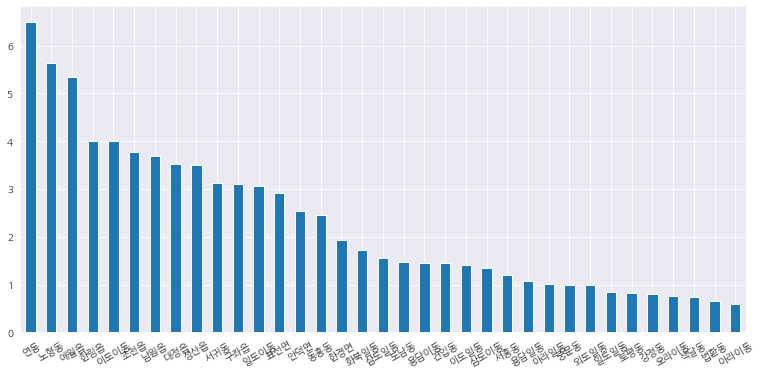

In [72]:
plt.figure(figsize=(13,6))
dong_A.plot.bar(rot= 30)

### 시구분 분석

In [68]:
df_2['시구분'].value_counts()

제주시     49546
서귀포시    24214
Name: 시구분, dtype: int64

<AxesSubplot:>

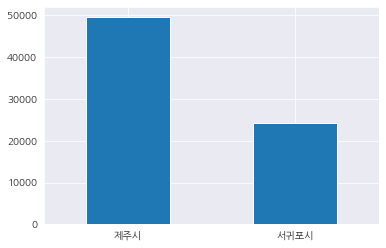

In [71]:
df_2['시구분'].value_counts().plot.bar(rot=0)

## 일도동,노형동,이도동,용담동,연동 분석

In [179]:
dongdong_1=(df_2[(df_2['동구분'] == '일도동') | (df_2['동구분'] =='노형동') | (df_2['동구분'] == '이도동')| (df_2['동구분'] == '용담동') |(df_2['동구분'] == '연동')]) 
# 일도동,노형동,이도동,용담동,연동

In [115]:
df_2[df_2['동구분'].str.contains('일도')]

,위치좌표 X축값,위치좌표 Y축값,장소명,소재지,시구분,동구분,year,month,day,dayofweek
65,126.544986,33.506391,서울빌라,제주특별자치도 제주시 일도이동 420-13,제주시,일도이동,2015,12,31,3
67,126.543961,33.506299,대창빌라,제주특별자치도 제주시 일도이동 404-9,제주시,일도이동,2015,12,31,3
380,126.536137,33.513615,유경주차장,제주특별자치도 제주시 일도이동 982-7,제주시,일도이동,2015,12,31,3
381,126.542449,33.508649,무료주차장,제주특별자치도 제주시 일도이동 370,제주시,일도이동,2015,12,31,3
501,126.534875,33.506016,제주민속관광타운주차장,제주특별자치도 제주시 일도이동 880-5,제주시,일도이동,2015,12,31,3
...,...,...,...,...,...,...,...,...,...,...
73297,126.541749,33.508016,현대자동차서비스일도점,제주특별자치도 제주시 일도이동 370-31,제주시,일도이동,2015,12,31,3
73489,126.524226,33.512965,제주외환은행,제주특별자치도 제주시 일도일동 1430-9,제주시,일도일동,2015,12,31,3
74199,126.525625,33.514790,LGUPLUS제주직영점,제주특별자치도 제주시 일도일동 1300-24,제주시,일도일동,2015,12,31,3
74204,126.542862,33.502600,LGUPLUS제주텔레콤일도점,제주특별자치도 제주시 일도이동 115,제주시,일도이동,2015,12,31,3


In [119]:
df_2[df_2['동구분'].str.contains('노형')]

,위치좌표 X축값,위치좌표 Y축값,장소명,소재지,시구분,동구분,year,month,day,dayofweek
14,126.473406,33.483001,노형맨션,제주특별자치도 제주시 노형동 2523-4,제주시,노형동,2015,12,31,3
16,126.480730,33.488767,대성맨션,제주특별자치도 제주시 노형동 1275-9,제주시,노형동,2015,12,31,3
24,126.483730,33.483643,원노형주택,제주특별자치도 제주시 노형동 934-9,제주시,노형동,2015,12,31,3
38,126.466094,33.471352,월산마을,제주특별자치도 제주시 노형동 3343,제주시,노형동,2015,12,31,3
50,126.470831,33.488025,정존,제주특별자치도 제주시 노형동 2583-1,제주시,노형동,2015,12,31,3
...,...,...,...,...,...,...,...,...,...,...
74371,126.484642,33.480685,훼미리마트노형아이파크점(구),제주특별자치도 제주시 원노형로 90,제주시,원노형로,2015,12,31,3
74379,126.451408,33.463003,제주서부관광지에스25,제주특별자치도 제주시 노형로 39,제주시,노형로,2015,12,31,3
74381,126.475181,33.478460,훼미리마트제주노형중점(구),제주특별자치도 제주시 노형동 1524,제주시,노형동,2015,12,31,3
74382,126.479680,33.483334,훼미리마트노형아이파크점(구),제주특별자치도 제주시 노형동 846,제주시,노형동,2015,12,31,3


In [120]:
df_2[df_2['동구분'].str.contains('이도')]

,위치좌표 X축값,위치좌표 Y축값,장소명,소재지,시구분,동구분,year,month,day,dayofweek
114,126.536175,33.490151,박쥐동산,제주특별자치도 제주시 이도이동 1999-12,제주시,이도이동,2015,12,31,3
357,126.525788,33.499875,무료주차장,제주특별자치도 제주시 이도일동 1944,제주시,이도일동,2015,12,31,3
358,126.536412,33.491867,제주소방서앞교차로,제주특별자치도 제주시 이도이동 1085-4,제주시,이도이동,2015,12,31,3
359,126.534887,33.501800,무료주차장,제주특별자치도 제주시 이도이동 1165-2,제주시,이도이동,2015,12,31,3
360,126.533538,33.495659,무료주차장,제주특별자치도 제주시 이도이동 1057-4,제주시,이도이동,2015,12,31,3
...,...,...,...,...,...,...,...,...,...,...
74213,126.538637,33.489101,신협본점,제주특별자치도 제주시 이도이동 2007-11,제주시,이도이동,2015,12,31,3
74222,126.534113,33.494725,뜨레주르제주법원점,제주특별자치도 제주시 이도이동 1085-4,제주시,이도이동,2015,12,31,3
74227,126.529450,33.499775,제주시청지에스25,제주특별자치도 제주시 이도이동 1772-27,제주시,이도이동,2015,12,31,3
74286,126.536225,33.498467,제주전력소전기자동차충전기,제주특별자치도 제주시 이도이동 1046,제주시,이도이동,2015,12,31,3


In [121]:
df_2[df_2['동구분'].str.contains('용담')]

,위치좌표 X축값,위치좌표 Y축값,장소명,소재지,시구분,동구분,year,month,day,dayofweek
57,126.506127,33.516023,세진빌라,제주특별자치도 제주시 용담삼동 516-2,제주시,용담삼동,2015,12,31,3
70,126.511252,33.509124,한천교,제주특별자치도 제주시 용담이동 2813-1,제주시,용담이동,2015,12,31,3
136,126.511252,33.502891,제3한천교,제주특별자치도 제주시 용담이동 2621-31,제주시,용담이동,2015,12,31,3
356,126.488716,33.518372,무료주차장,제주특별자치도 제주시 용담삼동 2396-10,제주시,용담삼동,2015,12,31,3
363,126.514552,33.502441,무료주차장,제주특별자치도 제주시 용담일동 2830-4,제주시,용담일동,2015,12,31,3
...,...,...,...,...,...,...,...,...,...,...
74243,126.502128,33.504074,아주에이비스렌터카제주지점(구),제주특별자치도 제주시 용담이동 735-24,제주시,용담이동,2015,12,31,3
74245,126.512327,33.511932,용담BBQ치킨,제주특별자치도 제주시 용담로 92,제주시,용담로,2015,12,31,3
74246,126.506277,33.509773,제주운암지에스25,제주특별자치도 제주시 용담이동 630-31,제주시,용담이동,2015,12,31,3
74247,126.512202,33.512015,SKTS텔레콤용담점,제주특별자치도 제주시 용담로 90,제주시,용담로,2015,12,31,3


In [122]:
df_2[df_2['동구분'].str.contains('연동')]

,위치좌표 X축값,위치좌표 Y축값,장소명,소재지,시구분,동구분,year,month,day,dayofweek
13,126.482967,33.491867,대진빌라,제주특별자치도 제주시 연동 1960-1,제주시,연동,2015,12,31,3
17,126.480542,33.491892,로얄아트빌라,제주특별자치도 제주시 연동 1952-3,제주시,연동,2015,12,31,3
18,126.492891,33.482701,백록빌라,제주특별자치도 제주시 연동 288-11,제주시,연동,2015,12,31,3
22,126.495042,33.468178,광이오름,제주특별자치도 제주시 연동 산 62,제주시,연동,2015,12,31,3
27,126.491867,33.465878,상여오름,제주특별자치도 제주시 연동 산 60,제주시,연동,2015,12,31,3
...,...,...,...,...,...,...,...,...,...,...
73926,126.499303,33.486268,제주은행제주웰컴센터지점,제주특별자치도 제주시 연동 313-80,제주시,연동,2015,12,31,3
73939,126.501153,33.493175,HP서비스센터제주점,제주특별자치도 제주시 연동 320-7,제주시,연동,2015,12,31,3
74276,126.490554,33.469736,한라수목원전기자동차충전기,제주특별자치도 제주시 연동 996,제주시,연동,2015,12,31,3
74319,126.496304,33.488626,제주KBS전기자동차충전기,제주특별자치도 제주시 연동 302,제주시,연동,2015,12,31,3


In [123]:
dongdong=df_2[df_2['동구분'].str.contains('일도|노형|이도|용담|연동')]

In [154]:
df_ildo = df_2[df_2['동구분'].str.contains('일도')]

In [164]:
df_ildo['장소명'].str.contains('호텔|모텔|여관').sum()

34

In [165]:
df_ildo['장소명'].str.contains('마트').sum()

53

In [166]:
df_ildo['장소명'].str.contains('주차장').sum()

139

In [172]:
df_no = df_2[df_2['동구분'].str.contains('노형')]

In [173]:
df_no['장소명'].str.contains('호텔|모텔|여관').sum()

21

In [156]:
df_ido = df_2[df_2['동구분'].str.contains('이도')]

In [157]:
df_yong = df_2[df_2['동구분'].str.contains('용담')]

In [158]:
df_yoen = df_2[df_2['동구분'].str.contains('연동')]

In [160]:
dongdong.head(10)

,위치좌표 X축값,위치좌표 Y축값,장소명,소재지,시구분,동구분,year,month,day,dayofweek
13,126.482967,33.491867,대진빌라,제주특별자치도 제주시 연동 1960-1,제주시,연동,2015,12,31,3
14,126.473406,33.483001,노형맨션,제주특별자치도 제주시 노형동 2523-4,제주시,노형동,2015,12,31,3
16,126.480730,33.488767,대성맨션,제주특별자치도 제주시 노형동 1275-9,제주시,노형동,2015,12,31,3
17,126.480542,33.491892,로얄아트빌라,제주특별자치도 제주시 연동 1952-3,제주시,연동,2015,12,31,3
18,126.492891,33.482701,백록빌라,제주특별자치도 제주시 연동 288-11,제주시,연동,2015,12,31,3
22,126.495042,33.468178,광이오름,제주특별자치도 제주시 연동 산 62,제주시,연동,2015,12,31,3
24,126.483730,33.483643,원노형주택,제주특별자치도 제주시 노형동 934-9,제주시,노형동,2015,12,31,3
27,126.491867,33.465878,상여오름,제주특별자치도 제주시 연동 산 60,제주시,연동,2015,12,31,3
28,126.495191,33.482843,삼창빌라,제주특별자치도 제주시 연동 306-10,제주시,연동,2015,12,31,3
29,126.495979,33.486592,코리아나호텔,제주특별자치도 제주시 연동 303-10,제주시,연동,2015,12,31,3


In [93]:
# dongdong.to_csv("dong.csv", mode='w',encoding='cp949')

In [111]:
dongdong.shape

(13488, 10)

In [125]:
dongdong['장소명'].str.contains('주차장').sum()

918

In [126]:
dongdong['장소명'].str.contains('빌라').sum()

898

In [127]:
dongdong['장소명'].str.contains('마트').sum()

291

In [128]:
dongdong['장소명'].str.contains('학교').sum()

202

In [145]:
dongdong['장소명'].str.contains('오름').sum()

57

In [149]:
dongdong['장소명'].str.contains('주택|빌라').sum()

1463

In [148]:
dongdong['장소명'].str.contains('모텔|여관|호텔').sum()

343

In [152]:
# df_dong= pd.DataFrame({'주차장':[918],
#                    '빌라':[898],
#                    '마트':[291],
#                    '학교':[202]})

# df_dong

df_dong = pd.DataFrame({'주차장':[918],
                   '빌라':[898],
                   '마트':[291],
                   '학교':[202], 
                            '숙박업소':[343]})
# ,index = ['a', 'b', 'c']
df_dong

,주차장,빌라,마트,학교,숙박업소
0,918,898,291,202,343


<AxesSubplot:>

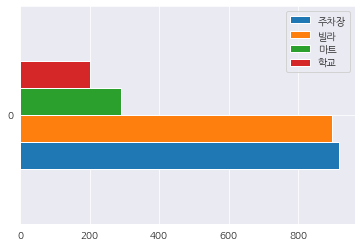

In [144]:
df_dong.plot.barh()

In [176]:
dongdong['장소명'].head(20)

13      대진빌라
14      노형맨션
16      대성맨션
17    로얄아트빌라
18      백록빌라
22      광이오름
24     원노형주택
27      상여오름
28      삼창빌라
29    코리아나호텔
36      은성빌딩
38      월산마을
43      거문오름
50        정존
51      한샘빌라
57      세진빌라
65      서울빌라
67      대창빌라
70       한천교
96      대광빌라
Name: 장소명, dtype: object

In [180]:
# jang_list=[]
# jang = dongdong['장소명']


# for i in range(len(dongdong)):

#     if jang.str.contains('주차').iloc == True:
#         jang_list.append('주차시설')
        
    
#     elif jang.str.contains('모텔|호텔|여관').iloc == True:
#         jang_list.append('숙박업소')
        
        
#     else:
#         jang_list.append('미정')
    
# print(jang_list)



# sido_list=[]
# sido = df_2['소재지'].str.contains('제주시')
# for i in range(len(df_2)):

#     if sido.iloc[i] == True:
#         sido_list.append('제주시')
        
    
#     elif sido.iloc[i] == False:
#         sido_list.append('서귀포시')
        
#     else:
#         pass
    
# print(sido_list)